In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews.csv'
# path = '/content/drive/My Drive/thesis-part1-combined 76402 reviews_ready_to_train with tf-idf and adv and adj.csv'
path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews with tf-idf adv and adj and intention.csv'

data0 = pd.read_csv(path)

In [4]:
data = data0.reindex(np.random.permutation(data0.index))

In [5]:
data

,helpfulness,rate,reviews,response,review_length,readability_score,sentence_count,review_complexity,review_subjectivity,review_polarity,review_nouns_count,review_verbs_count,number_of_anger_words_in_reviews,number_of_sadness_words_in_reviews,number_of_Anxiety_words_in_reviews,number_of_Negative_Emotions_words_in_reviews,number_of_Positive_Emotions_words_in_reviews,number_of_deontics_words_in_reviews,review_sentiment,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,review_adj_count,review_adv_count,sum_of_tfidf,feature request,problem discovery,information seeking,information giving,other
50063,0,5,use sever country veri accuratethumb,0,36,49.48,1,7.6,0.000000,0.000000,5,0,0,0,0,0,0,0,-1,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0,0,1.992257,0,0,0,0,1
115954,0,5,screen chang cream milk colour,0,30,117.16,1,-1.9,0.000000,0.000000,5,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,2.173395,0,0,0,0,1
70596,731,1,past 15 year wa use viper say tri place intern...,1,454,10.58,1,32.9,0.279167,-0.037500,72,4,0,0,0,0,0,0,0,0.00,0.21,0.22,0.00,0.27,0.00,0.00,0.05,0.23,0.00,2,7,5.630017,0,0,0,0,1
92851,0,5,easy use,0,8,120.21,1,-3.1,0.833333,0.433333,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,1,0,1.394160,0,0,0,0,1
99620,0,4,use app month work pretty well bar issue speed...,1,400,19.38,1,27.5,0.910000,0.170000,54,3,0,0,0,0,2,0,0,0.19,0.23,0.00,0.00,0.00,0.07,0.00,0.45,0.05,0.00,1,10,5.378170,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119717,0,5,work great ha info need,0,23,100.24,1,0.5,0.750000,0.800000,4,0,0,0,0,0,0,0,2,0.03,0.34,0.03,0.03,0.03,0.03,0.03,0.03,0.46,0.03,1,0,2.179449,0,0,0,0,1
5171,0,5,easy use app alway look review product,0,38,81.29,1,3.7,0.833333,0.433333,5,0,0,0,0,0,0,0,0,0.28,0.02,0.02,0.02,0.02,0.02,0.59,0.02,0.02,0.02,1,1,2.560161,0,0,0,0,1
59500,0,3,catch time slow transfer speed slow also,1,40,89.75,1,2.5,0.400000,-0.300000,4,2,0,0,0,0,0,0,0,0.02,0.27,0.02,0.02,0.21,0.02,0.24,0.18,0.02,0.02,0,1,2.274754,0,0,0,0,1
13063,2,4,veri plea expert today busy work tri help reco...,0,96,71.14,1,7.6,0.250000,0.150000,14,1,0,0,0,0,0,0,-1,0.32,0.23,0.01,0.10,0.01,0.01,0.01,0.20,0.01,0.10,1,1,3.860843,0,0,0,0,1


In [6]:
data=data.drop(data.columns[2], axis=1)

In [7]:
data

,helpfulness,rate,response,review_length,readability_score,sentence_count,review_complexity,review_subjectivity,review_polarity,review_nouns_count,review_verbs_count,number_of_anger_words_in_reviews,number_of_sadness_words_in_reviews,number_of_Anxiety_words_in_reviews,number_of_Negative_Emotions_words_in_reviews,number_of_Positive_Emotions_words_in_reviews,number_of_deontics_words_in_reviews,review_sentiment,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,review_adj_count,review_adv_count,sum_of_tfidf,feature request,problem discovery,information seeking,information giving,other
50063,0,5,0,36,49.48,1,7.6,0.000000,0.000000,5,0,0,0,0,0,0,0,-1,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0,0,1.992257,0,0,0,0,1
115954,0,5,0,30,117.16,1,-1.9,0.000000,0.000000,5,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0,0,2.173395,0,0,0,0,1
70596,731,1,1,454,10.58,1,32.9,0.279167,-0.037500,72,4,0,0,0,0,0,0,0,0.00,0.21,0.22,0.00,0.27,0.00,0.00,0.05,0.23,0.00,2,7,5.630017,0,0,0,0,1
92851,0,5,0,8,120.21,1,-3.1,0.833333,0.433333,1,0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,1,0,1.394160,0,0,0,0,1
99620,0,4,1,400,19.38,1,27.5,0.910000,0.170000,54,3,0,0,0,0,2,0,0,0.19,0.23,0.00,0.00,0.00,0.07,0.00,0.45,0.05,0.00,1,10,5.378170,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119717,0,5,0,23,100.24,1,0.5,0.750000,0.800000,4,0,0,0,0,0,0,0,2,0.03,0.34,0.03,0.03,0.03,0.03,0.03,0.03,0.46,0.03,1,0,2.179449,0,0,0,0,1
5171,0,5,0,38,81.29,1,3.7,0.833333,0.433333,5,0,0,0,0,0,0,0,0,0.28,0.02,0.02,0.02,0.02,0.02,0.59,0.02,0.02,0.02,1,1,2.560161,0,0,0,0,1
59500,0,3,1,40,89.75,1,2.5,0.400000,-0.300000,4,2,0,0,0,0,0,0,0,0.02,0.27,0.02,0.02,0.21,0.02,0.24,0.18,0.02,0.02,0,1,2.274754,0,0,0,0,1
13063,2,4,0,96,71.14,1,7.6,0.250000,0.150000,14,1,0,0,0,0,0,0,-1,0.32,0.23,0.01,0.10,0.01,0.01,0.01,0.20,0.01,0.10,1,1,3.860843,0,0,0,0,1


In [8]:
data=data.drop(data.columns[5], axis=1)

In [9]:
X = data[['rate','review_length','readability_score','review_subjectivity','review_verbs_count','review_sentiment','Topic1','Topic6','review_adj_count','review_adv_count','sum_of_tfidf','information giving','other']] 

In [10]:
# X = data.drop('response', axis=1)
y = data['response']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
DecisionTreeClassifier_model = tree.DecisionTreeClassifier()
DecisionTreeClassifier_model = DecisionTreeClassifier_model.fit(X_train, y_train)

In [13]:
y_pred_DecisionTreeClassifier_model= DecisionTreeClassifier_model.predict(X_test)

In [14]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DecisionTreeClassifier_model))

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DecisionTreeClassifier_model))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     15908
           1       0.57      0.56      0.56      8543

    accuracy                           0.70     24451
   macro avg       0.67      0.67      0.67     24451
weighted avg       0.70      0.70      0.70     24451



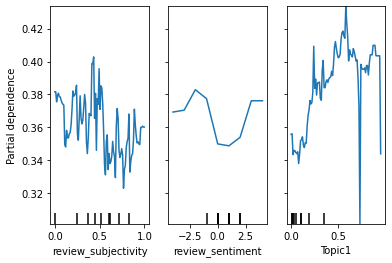

In [16]:
from sklearn.inspection import plot_partial_dependence
features = [3,5,6]
plot_partial_dependence(DecisionTreeClassifier_model,X_train, features) 